In [1]:
# 全國五大超商資料初步分析
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 讀取資料
file_path = "全國5大超商資料集.csv"
df = pd.read_csv(file_path)

# 清除欄位名稱的空白
df.columns = df.columns.str.strip()

# 處理民國年格式轉換成西元年（欄位名稱要正確）
def convert_roc_date(roc_str):
    try:
        roc_str = str(int(roc_str)).zfill(7)  # 補齊為7位數
        year = int(roc_str[:3]) + 1911
        month = int(roc_str[3:5])
        day = int(roc_str[5:7])
        return pd.Timestamp(f"{year}-{month:02d}-{day:02d}")
    except:
        return pd.NaT

df["西元設立日期"] = df["分公司核准設立日期"].apply(convert_roc_date)
df["設立年份"] = df["西元設立日期"].dt.year


In [2]:
# 讀取資料
file_path = "全國5大超商資料集.csv"
df = pd.read_csv(file_path)

# 清除欄位名稱的空白
df.columns = df.columns.str.strip()

# 處理民國年格式轉換成西元年（欄位名稱要正確）
def convert_roc_date(roc_str):
    try:
        roc_str = str(int(roc_str)).zfill(7)  # 補齊為7位數
        year = int(roc_str[:3]) + 1911
        month = int(roc_str[3:5])
        day = int(roc_str[5:7])
        return pd.Timestamp(f"{year}-{month:02d}-{day:02d}")
    except:
        return pd.NaT

df["西元設立日期"] = df["分公司核准設立日期"].apply(convert_roc_date)
df["設立年份"] = df["西元設立日期"].dt.year


In [3]:
# 檢查資料概況
print("\n基本欄位與缺漏值：")
print(df.info())


基本欄位與缺漏值：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21882 entries, 0 to 21881
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   公司統一編號       21882 non-null  int64         
 1   公司名稱         21882 non-null  object        
 2   分公司統一編號      21882 non-null  int64         
 3   分公司名稱        21882 non-null  object        
 4   分公司地址        21882 non-null  object        
 5   分公司狀態        21882 non-null  int64         
 6   分公司核准設立日期    21882 non-null  object        
 7   分公司最後核准變更日期  21882 non-null  object        
 8   西元設立日期       21879 non-null  datetime64[ns]
 9   設立年份         21879 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 1.7+ MB
None


In [7]:
# 新增縣市欄位（從地址中擷取前兩碼）
df["縣市"] = df["分公司地址"].str[:3]

In [9]:
# 各品牌分店數量排行
brand_counts = df["公司名稱"].value_counts()
print("\n各品牌分店數量：")
print(brand_counts)



各品牌分店數量：
公司名稱
統一超商股份有限公司      10124
全家便利商店股份有限公司     5691
萊爾富國際股份有限公司      2865
來來超商股份有限公司       1738
全聯實業股份有限公司       1464
Name: count, dtype: int64


In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft JhengHei'


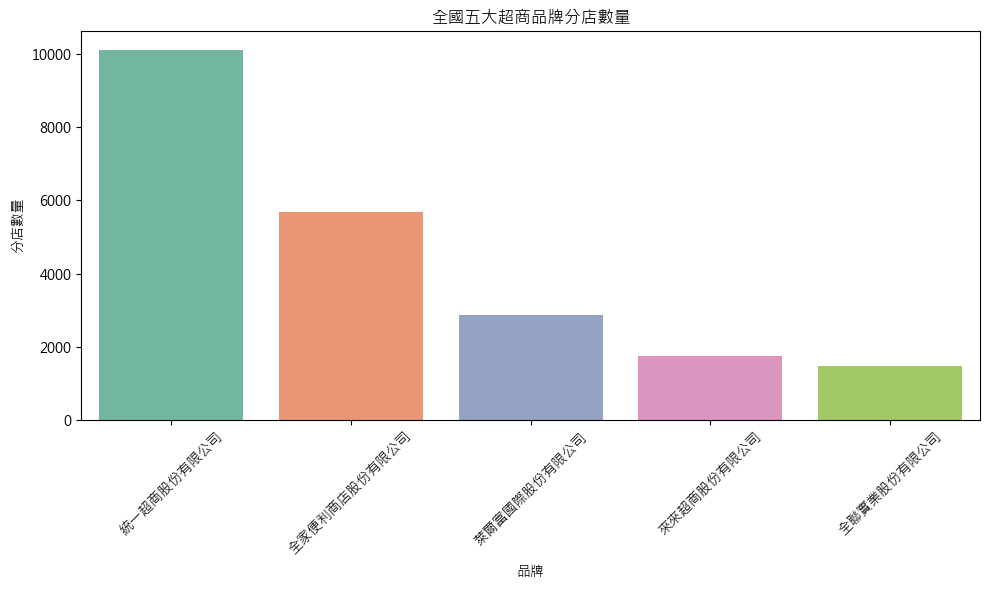

In [13]:
# 繪製長條圖
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, hue=brand_counts.index, palette="Set2", legend=False)
plt.title("全國五大超商品牌分店數量")
plt.ylabel("分店數量")
plt.xlabel("品牌")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

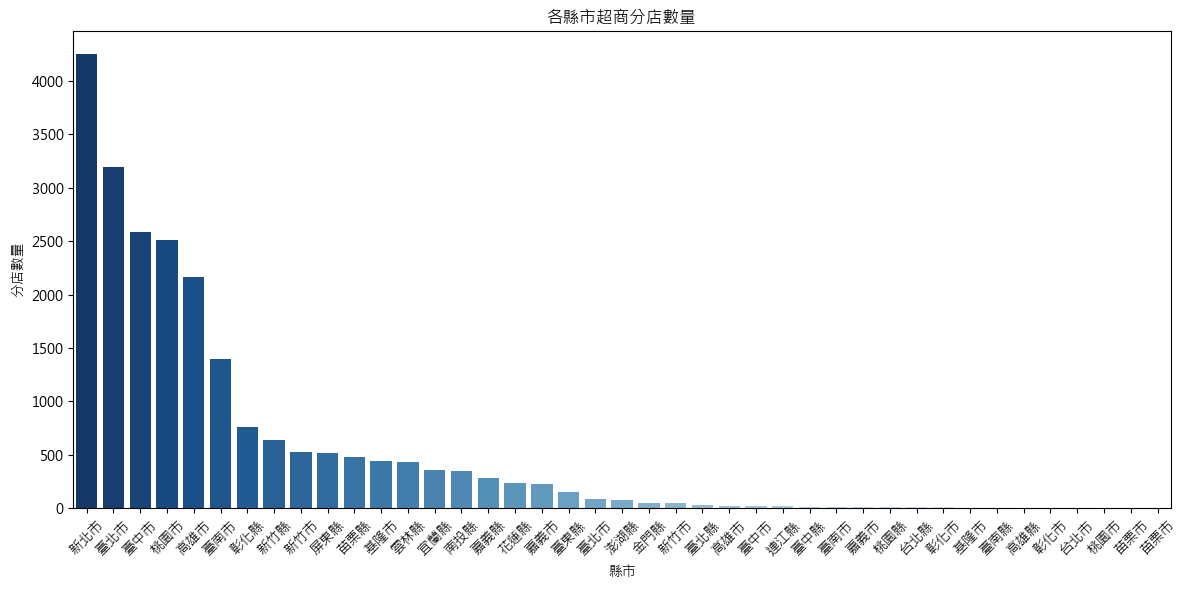

In [15]:
# 各縣市分店分佈
city_counts = df["縣市"].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette="Blues_r", legend=False)
plt.title("各縣市超商分店數量")
plt.ylabel("分店數量")
plt.xlabel("縣市")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

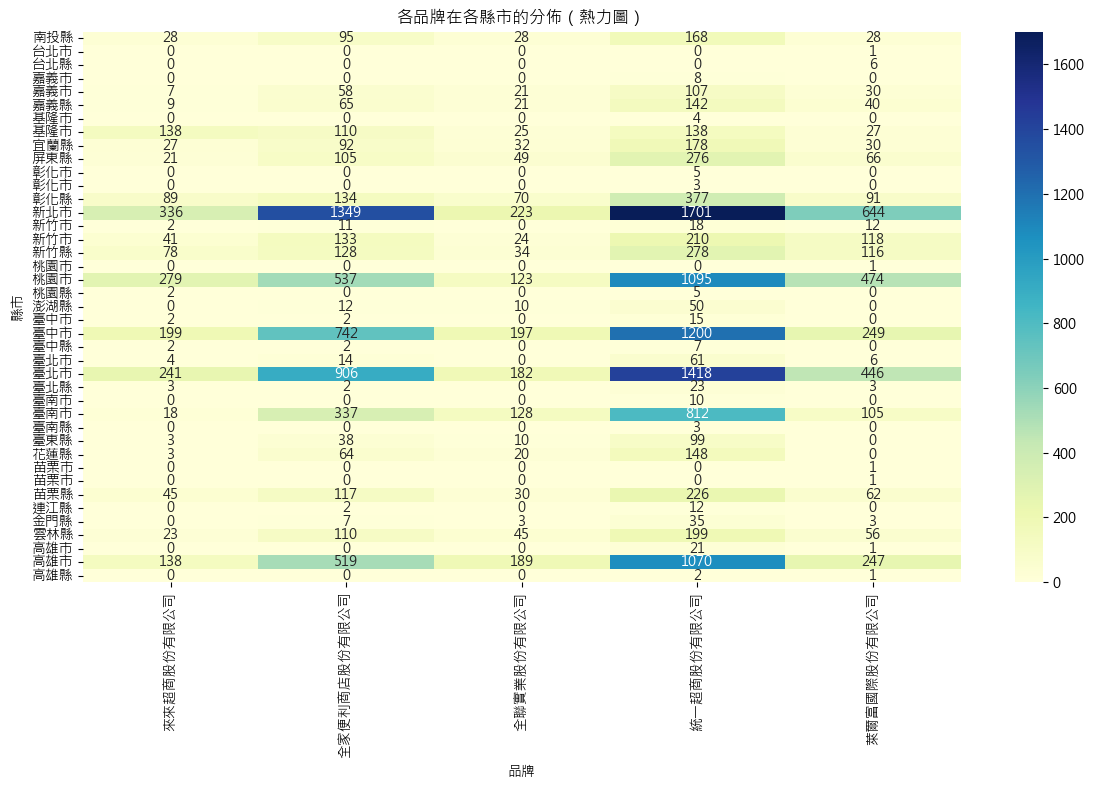

In [17]:
# 各品牌在各縣市的分佈（熱力交叉表）
brand_city_crosstab = pd.crosstab(df["縣市"], df["公司名稱"])
plt.figure(figsize=(12, 8))
sns.heatmap(brand_city_crosstab, cmap="YlGnBu", annot=True, fmt="d")
plt.title("各品牌在各縣市的分佈（熱力圖）")
plt.ylabel("縣市")
plt.xlabel("品牌")
plt.tight_layout()
plt.show()


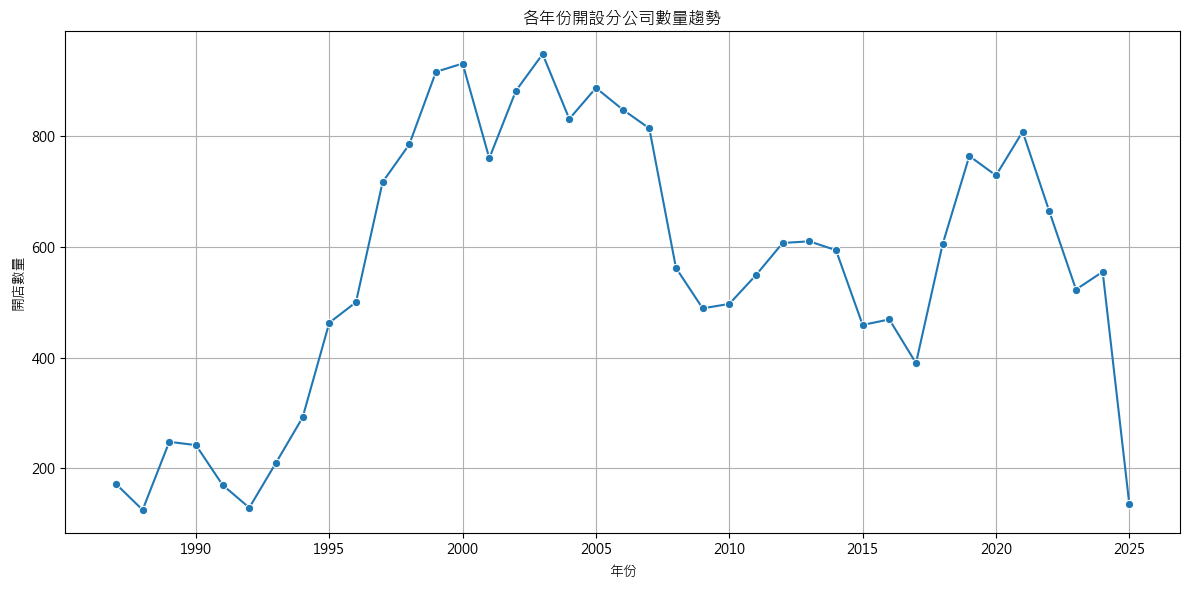

In [19]:
# 處理數字型民國年月日（如1011012）
def convert_roc_numeric(date_val):
    try:
        date_str = str(int(date_val)).zfill(7)  # 確保補足7位數
        roc_year = int(date_str[:3])
        month = int(date_str[3:5])
        day = int(date_str[5:7])
        ad_year = roc_year + 1911
        return pd.Timestamp(f"{ad_year}-{month:02d}-{day:02d}")
    except:
        return pd.NaT

# 應用轉換
df["西元設立日期"] = df["分公司核准設立日期"].apply(convert_roc_numeric)
df["設立年份"] = df["西元設立日期"].dt.year

# 畫趨勢圖
yearly_counts = df["設立年份"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
plt.title("各年份開設分公司數量趨勢")
plt.xlabel("年份")
plt.ylabel("開店數量")
plt.grid(True)
plt.tight_layout()
plt.savefig('各年份開設分公司數量趨勢.png', dpi=300, bbox_inches='tight')

<Figure size 1400x600 with 0 Axes>

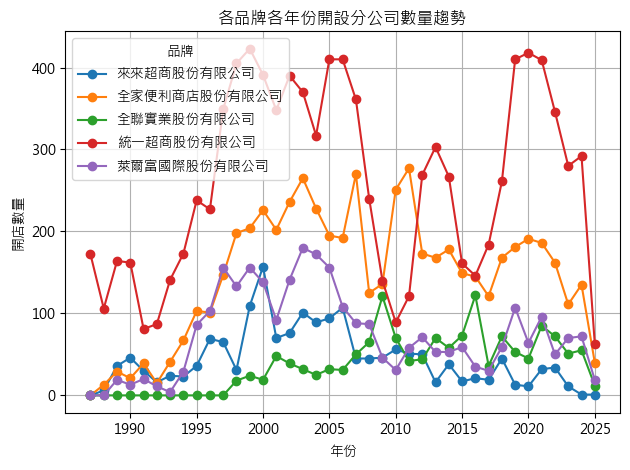

In [21]:
# 各品牌每年開店數量
trend = df.groupby(["設立年份", "公司名稱"]).size().unstack(fill_value=0)

# 畫線圖
plt.figure(figsize=(14, 6))
trend.plot(marker='o')
plt.title("各品牌各年份開設分公司數量趨勢")
plt.xlabel("年份")
plt.ylabel("開店數量")
plt.legend(title="品牌")
plt.grid(True)
plt.tight_layout()
plt.savefig('各品牌各年份開設分公司數量趨勢.png', dpi=300, bbox_inches='tight')